# Lez 7

## Q2: Consistent plotting

(This is about python's dectorators)

Write a decorator for the plots of all your papers. 

- Remember a decorator takes a function. 
- This function in turn should return a matplotlib figure object.
- Before the function is called, the decorator should initialize a matplotlib figure with the options that you like the most (fontsize, ticks, etc etc)
- After the figure it's done, the decorator should save it to pdf.

This is a great hack for your papers! You do this once and for all, and all plots in your paper will be beautifull, all with the same style/fontsize/etc. All you'll need to do is adding `@myplot` to the relevant plotting functions. 
    
The decorator that I use for my papers is available in my python module [skywalker](https://github.com/dgerosa/skywalker).  

In [2]:
import numpy as np
import matplotlib.pyplot as plt

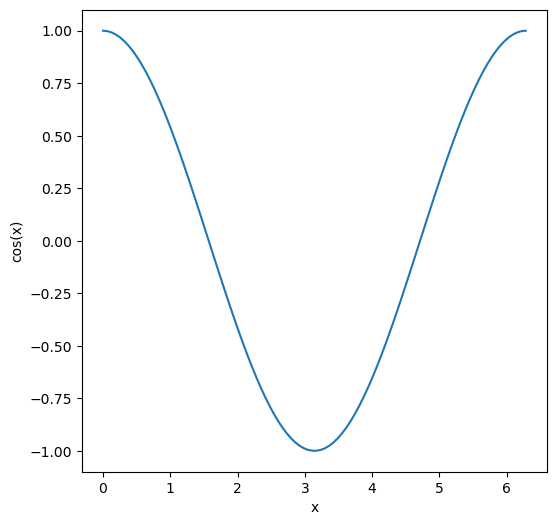

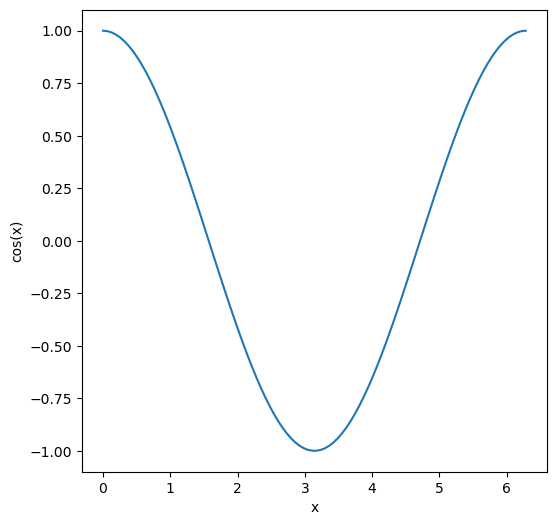

In [3]:
x = np.linspace(0,2.0*np.pi, num=100)
y = np.cos(x)


def makeplot(x, y, xlabel, ylabel):
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    ax.plot(x,y)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    return fig

makeplot(x, y, "x", "cos(x)")

In [4]:
def plot(function):
    def wrapper(*args, **kwargs):
        from matplotlib import rc
        from tqdm import tqdm
        
        # PLOT SETTINGS
        rc('font', family='serif', serif='cmr10', weight='medium', size=16)
        rc('figure', max_open_warning=1000)
        rc('xtick', top=True)
        rc('ytick', right=True)
        rc("axes", grid=False)
        rc('axes', unicode_minus=False)

        import matplotlib.pyplot as plt
        from mpl_toolkits.mplot3d import Axes3D
        from matplotlib.backends.backend_pdf import PdfPages
        from matplotlib.ticker import AutoMinorLocator,MultipleLocator,LogLocator,NullFormatter
        from matplotlib.colors import LogNorm
        # PDF
        with PdfPages(f"{"figura"}.pdf") as pp:
            figs = function(*args, **kwargs)

            figs = [figs]

            for fig in tqdm(figs, desc="Saving"):
                
                fig.savefig(pp, format='pdf', bbox_inches='tight')
                
    return wrapper



C:\Users\guide\AppData\Local\Temp\ipykernel_5668\3370639259.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = fig.add_subplot(111)
Saving: 100%|██████████| 1/1 [00:00<00:00,  7.28it/s]


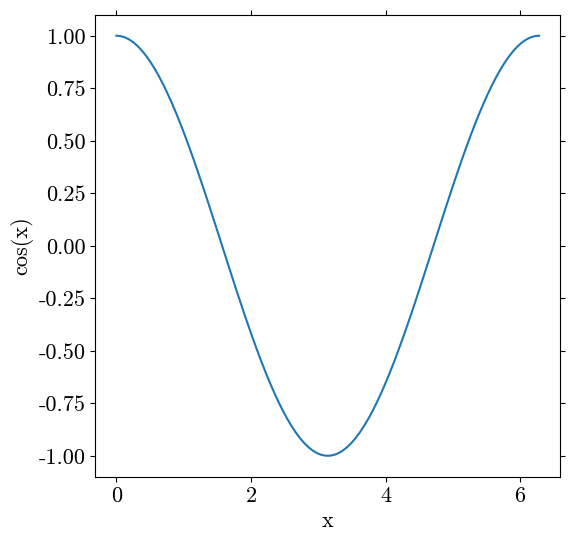

In [5]:
good_plot =  plot(makeplot)

good_plot(x,y,  "x", "cos(x)")

## Q3: Scaling

(This is about multiprocessing)

The ["scaling"](https://hpc-wiki.info/hpc/Scaling) of a code refers to its performance of as a function of the number of cores adopted. 

- Define a computationally intensive task (something like an operation on two giant arrays with >1e7 numbers or, even better!, pick somethinbg from your research). 
- Make sure it's embarrassingly parallel. 
- Implement a parallelization strategy using multiprocessing. 
- Plot the time the code takes as a function of the number of cores.
- Figure out the number of cores in your CPU and make sure the plot extends both below and above this number.
- Interpret the resulting features. 
- A perfect scaling results in straight line (linear dependency). How perfect is your scaling?

In [14]:
#You might need to pip install pathos and tqdm

import numpy as np
import multiprocessing, pathos.multiprocessing
from tqdm.notebook import tqdm
import os
import time

In [16]:
def func(a, b):
    import numpy as np
    import multiprocessing, pathos.multiprocessing
    from tqdm.notebook import tqdm
    import os
    import time

    result = 0
    
    return np.sqrt(a * b).sum()

In [18]:
N = int(1e4)
a = np.linspace(0,1,N)
b = np.linspace(0,1,N)

In [20]:
multiprocessing.cpu_count()

12

In [22]:
%%time 

result = list(  map(func, a,b)  )

CPU times: total: 62.5 ms
Wall time: 104 ms


In [39]:
CPUS = [2, 4, 6, 8, 10, 12, 14, 16]

# Esecuzione in loop per vari valori di CPUS
for cpu in CPUS:
    print(f"CPUS = {cpu}")
    parmap = pathos.multiprocessing.ProcessingPool(cpu).imap
    %time result = list(parmap(func, a, b))

    print("\n")

CPUS = 2
CPU times: total: 6.89 s
Wall time: 16.9 s


CPUS = 4
CPU times: total: 6.39 s
Wall time: 16.5 s


CPUS = 6
CPU times: total: 7.05 s
Wall time: 16.6 s


CPUS = 8
CPU times: total: 6.38 s
Wall time: 16.8 s


CPUS = 10
CPU times: total: 6.78 s
Wall time: 16.7 s


CPUS = 12
CPU times: total: 5.62 s
Wall time: 19.2 s


CPUS = 14
CPU times: total: 7.31 s
Wall time: 19.1 s


CPUS = 16
CPU times: total: 7.67 s
Wall time: 19.4 s




In [41]:
times = [6.89 , 6.39, 7.05, 6.3, 6.78, 5.62, 7.32, 7.67]

C:\Users\guide\AppData\Local\Temp\ipykernel_5668\3370639259.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  ax = fig.add_subplot(111)
Saving: 100%|██████████| 1/1 [00:00<00:00,  9.16it/s]


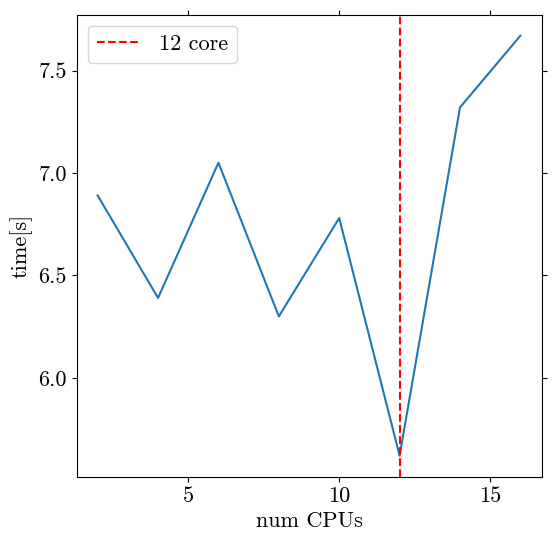

In [55]:
CPUS_vs_time =  plot(makeplot)

good_plot(CPUS, times,  "num CPUs", "time[s]")
plt.axvline(x=12, color='r', linestyle='--', label=f"{num_cores} core")
plt.legend()

**Interpret the resulting features**


The graph show a saturation after 12 cores, which is the maximum number of cores available. Beyond this point, increasing the number of cores does not provide any improvement but, on the other end, results in a worse performance.

Before reaching 12 cores, we would expect linear scaling. This doesn't happend but we can still notice a decreasing behaviour even in presence of some peaks.